<a href="https://colab.research.google.com/github/Adnan-Alaref/Deep_Learning-Jupter_Notebooks/blob/main/car_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
! pip install kaggle > /dev/null 2>&1

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Upload the json file to Google Drive and then copy to the temporary location.

In [15]:
! cd /content/drive/MyDrive/Colab Notebooks/kaggle_API_credentials/kaggle (1).json ~/.kaggle/kaggle (1).json

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: ` cd /content/drive/MyDrive/Colab Notebooks/kaggle_API_credentials/kaggle (1).json ~/.kaggle/kaggle (1).json'


Change the file permissions to read/write to the owner only

In [16]:
!chmod 600 ~/.kaggle/kaggle (1).json

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 ~/.kaggle/kaggle (1).json'


1- Download datasets (that are not part of competition)

In [20]:
! kaggle datasets download nehalbirla/vehicle-dataset-from-cardekho

Dataset URL: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
License(s): DbCL-1.0
  0% 0.00/292k [00:00<?, ?B/s]
100% 292k/292k [00:00<00:00, 79.7MB/s]


Move Dataset to spicific folder i create it

In [21]:
!mv /content/vehicle-dataset-from-cardekho.zip /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials

Unzip, in case the downloaded file is zipped. Refresh the files on the left hand side to update the view.

In [23]:
! unzip /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/vehicle-dataset-from-cardekho.zip -d /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials

Archive:  /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/vehicle-dataset-from-cardekho.zip
  inflating: /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/CAR DETAILS FROM CAR DEKHO.csv  
  inflating: /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/Car details v3.csv  
  inflating: /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/car data.csv  
  inflating: /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/car details v4.csv  


In [11]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV


from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate

from scipy import stats
from numpy.linalg import cond
from scipy.stats import anderson
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

sns.set()
%matplotlib inline
pd.set_option('display.max_rows', 10)

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Ignore all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)


In [25]:
! pip install lazypredict > /dev/null 2>&1

## Use Automatic Library Pandas - Profiling To Make EDA

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip > /dev/null 2>&1

Restart kernal

In [ ]:
import os
os._exit(00)

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport

Auto_df = pd.read_csv(r'/content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/car data.csv')
print(Auto_df.head(10))

# Create a profile report
Profile = ProfileReport(Auto_df ,title = "Pandas Profiling Report" ,explorative = True,
                       correlations={"pearson": {"calculate": True}}, # turn on/off correlations
                       vars={"num": {"low_categorical_threshold": 0}},
                       interactions={"continuous": True},           # Enable continuous interactions (scatter plots, etc.)
                       #sample={"head": 10},
                       )
# View the report in a notebook
Profile.to_notebook_iframe()

# Optionally, save the report as an HTML file
Profile.to_file("output_report.html")

        Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0           ritz  2014           3.35           5.59       27000    Petrol   
1            sx4  2013           4.75           9.54       43000    Diesel   
2           ciaz  2017           7.25           9.85        6900    Petrol   
3        wagon r  2011           2.85           4.15        5200    Petrol   
4          swift  2014           4.60           6.87       42450    Diesel   
5  vitara brezza  2018           9.25           9.83        2071    Diesel   
6           ciaz  2015           6.75           8.12       18796    Petrol   
7        s cross  2015           6.50           8.61       33429    Diesel   
8           ciaz  2016           8.75           8.89       20273    Diesel   
9           ciaz  2015           7.45           8.92       42367    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Step 1: Read Dataset</p>

In [4]:
df_main = pd.read_csv(r'/content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/car data.csv')
df_main

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0  
2        Dealer       Manual      0  
3        Dealer       Manual      0  
4        Dealer       Manual      0  
..          ...          ...    ...  
296      Dealer       Manual      0  
297      Dealer       Manual      0  
298      Dealer       Manual      0  
299      Dealer       Manual      0  
300      Dealer       Manual      0  

[301 rows x 9 columns]

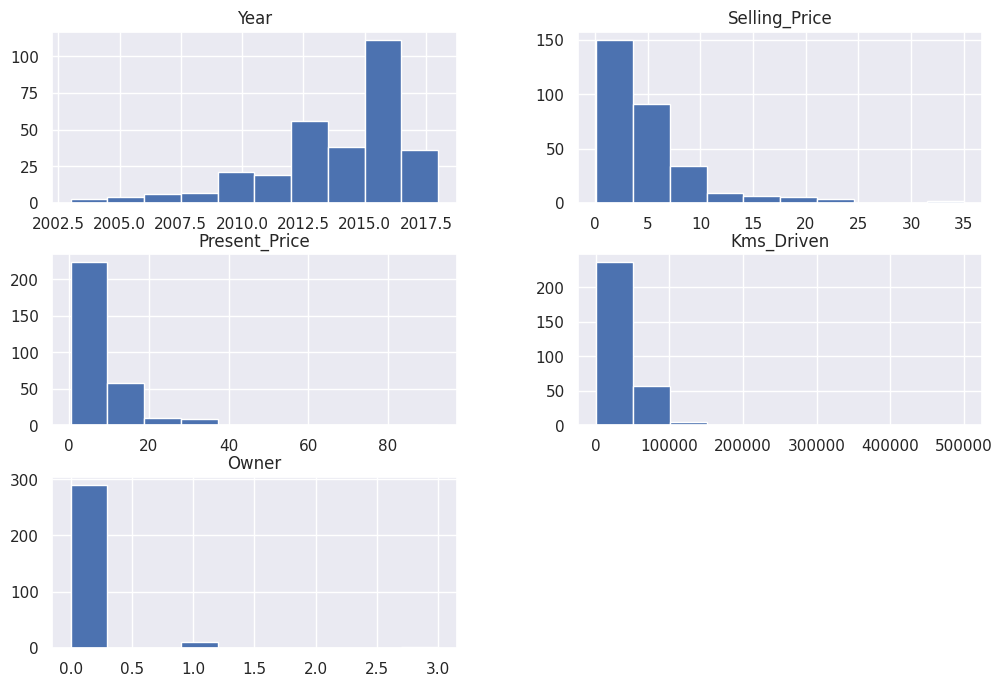

In [ ]:
df_main.hist(figsize =(12,8))
plt.show()

In [5]:
print(df_main['Fuel_Type'].unique())
print(df_main['Seller_Type'].unique())
print(df_main['Transmission'].unique())
print(df_main['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
df_main.drop(labels = 'Car_Name' ,axis = 'columns' ,inplace=True)

In [7]:
df_main.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df_main.insert(0,'Age',df_main.Year.max()+1 - df_main.Year)
df_main.drop(labels = 'Year' ,axis = 'columns',inplace=True)
df_main.head(2).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

In [9]:
df_main.head(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

In [12]:
Outliers_data  = []
Outliers_Index = []
target_feature = 'Selling_Price'

# first calc outliers for Object data with Selling_Price
for col in df_main.select_dtypes(include = 'object').columns:
    for cat in df_main[col].unique(): # this return ex... ['Dealer', 'Individual']
        df_cur_cat = df_main[df_main[col]==cat]
        Q1 = np.percentile(df_cur_cat[target_feature],25)
        Q3 = np.percentile(df_cur_cat[target_feature],75)
        # Calc IQR
        IQR = Q3 - Q1
        # Define outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        Outliers_samples = df_cur_cat[(df_cur_cat[target_feature] < lower_bound) | (df_cur_cat[target_feature] > upper_bound)]
        Outliers_data.extend(Outliers_samples.values.tolist())
        Outliers_Index.extend(Outliers_samples.index.tolist())

# Second calc outliers for Numerical data
for col in df_main.select_dtypes(include = 'number').columns:
        Q1 = np.percentile(df_main[col],25)
        Q3 = np.percentile(df_main[col],75)
        # Calc IQR
        IQR = Q3 - Q1
        # Define outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        Outliers_samples = df_main[(df_main[col] < lower_bound) | (df_main[col] > upper_bound)]
        Outliers_data.extend(Outliers_samples.values.tolist())
        Outliers_Index.extend(Outliers_samples.index.tolist())

Outliers_Index = list(set(Outliers_Index))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(Outliers_Index), Outliers_Index))

38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


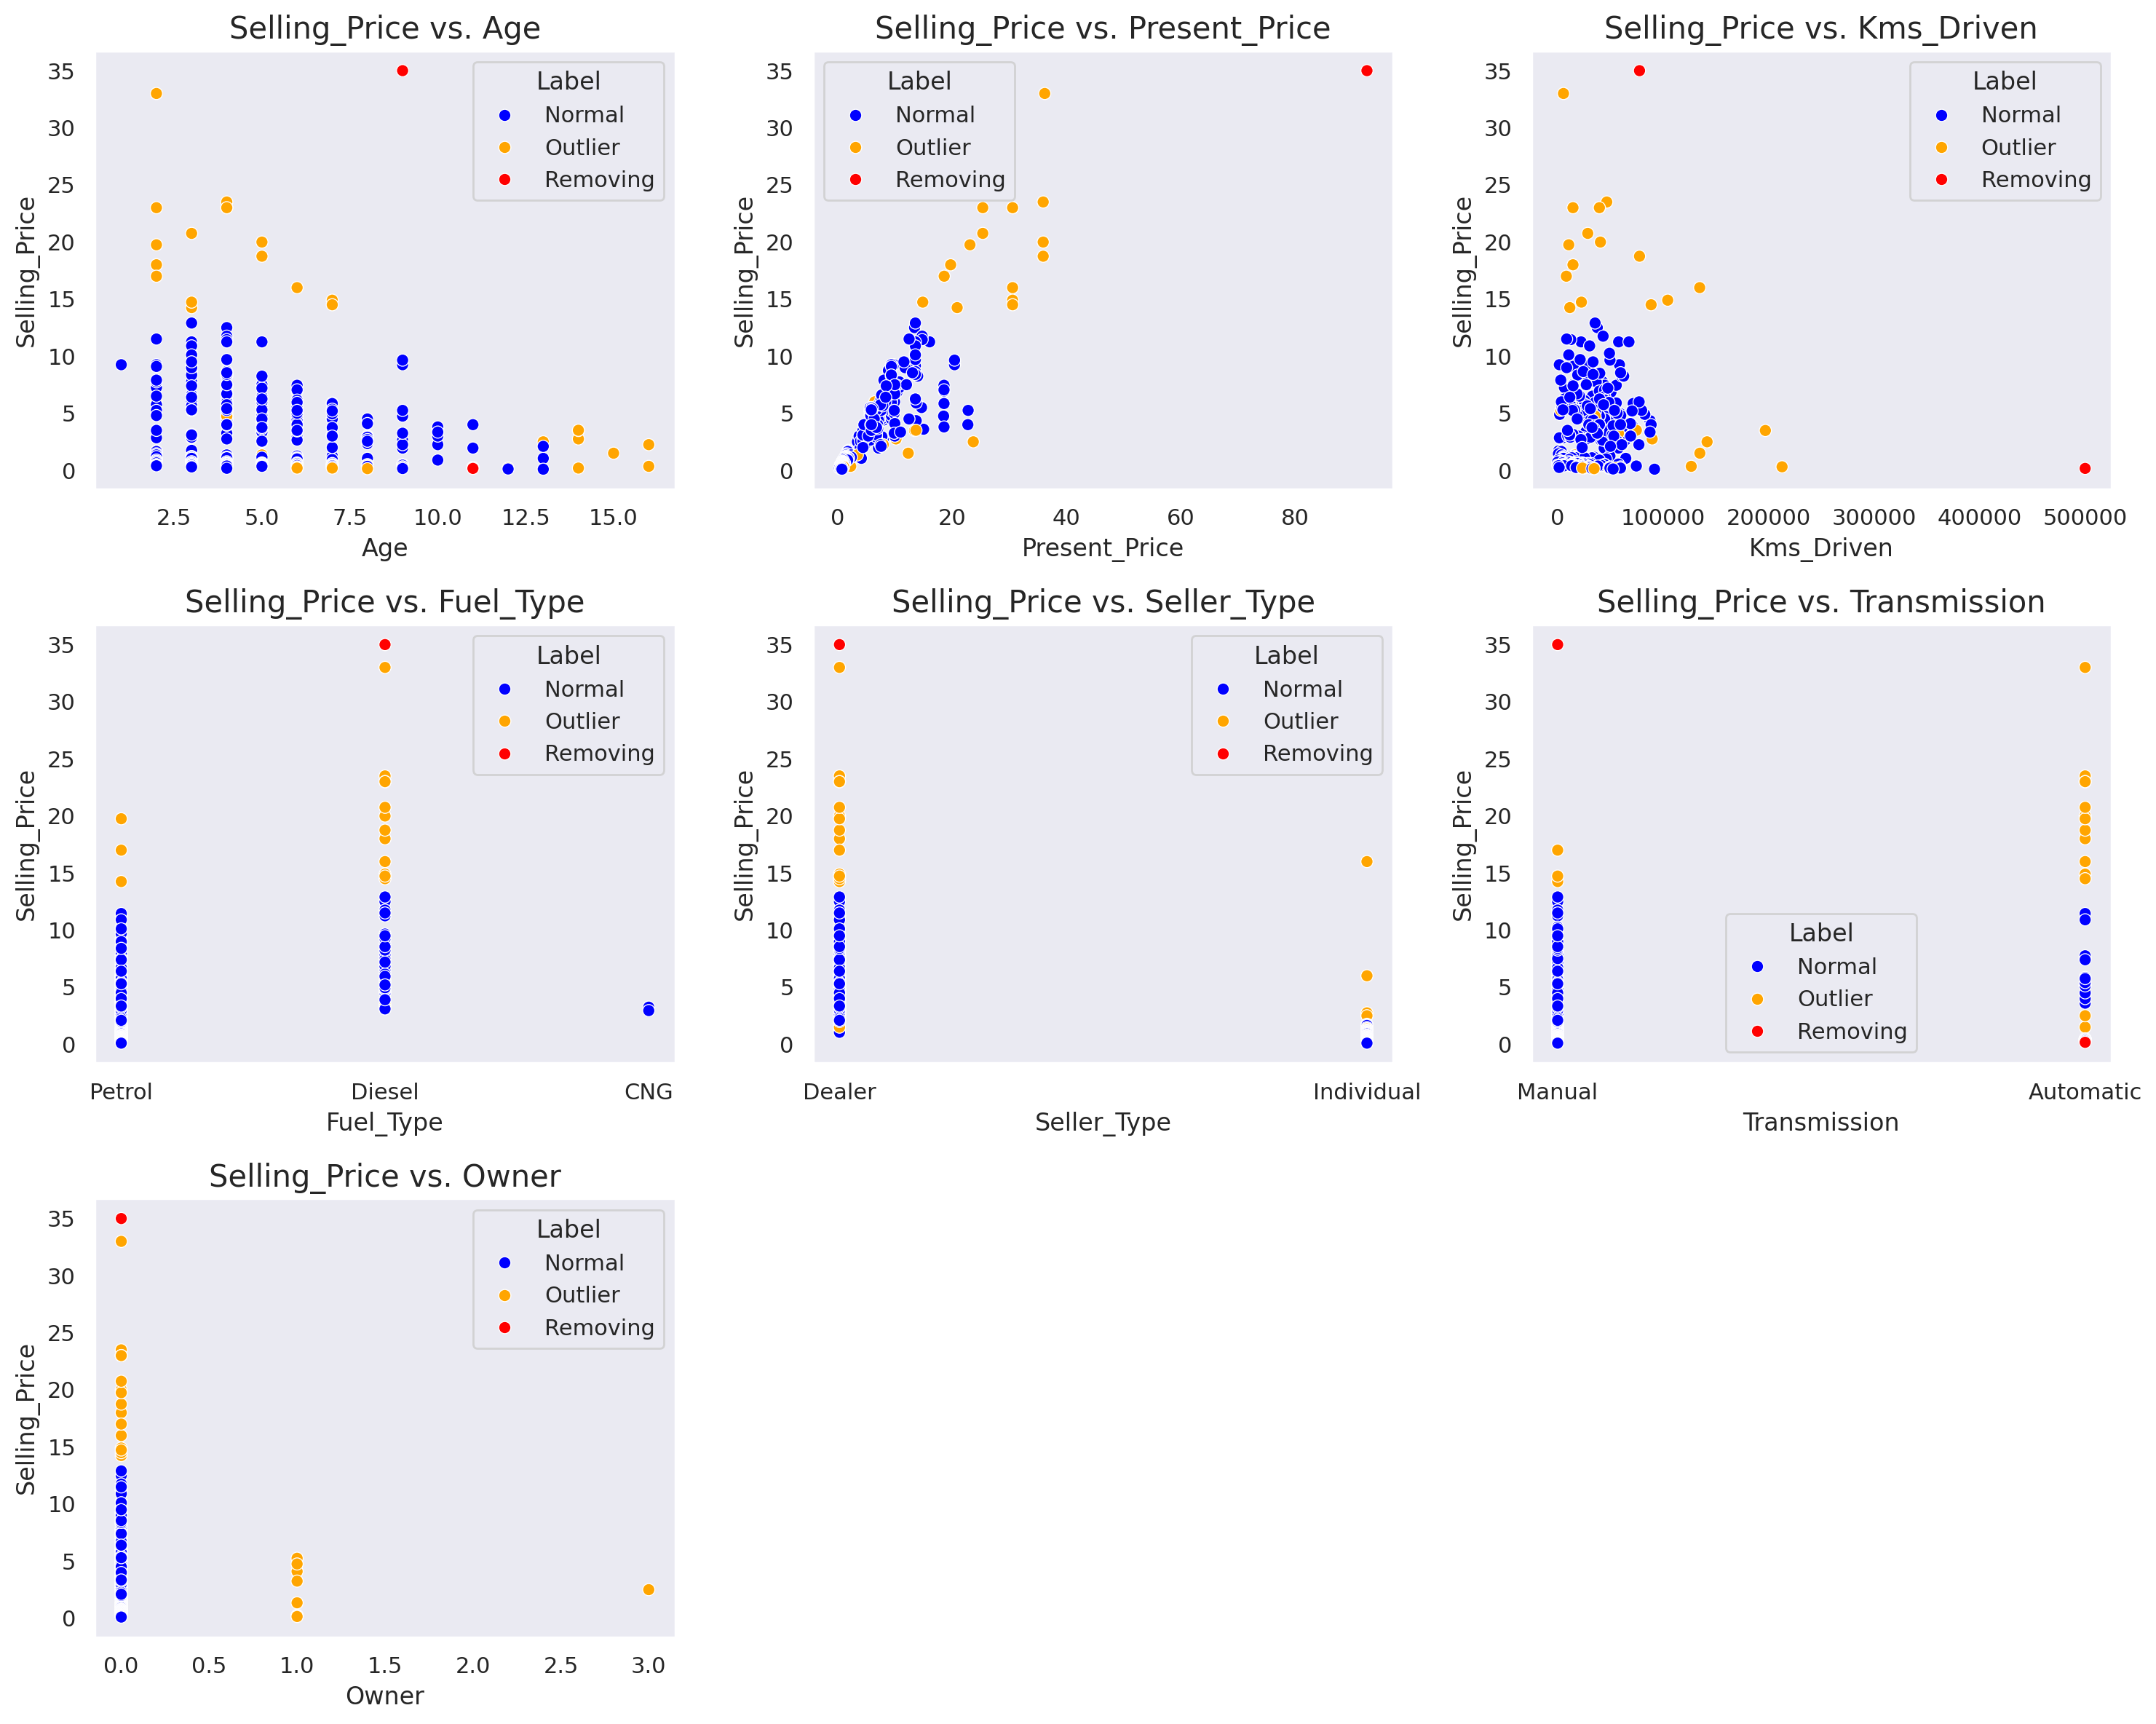

In [13]:
target = 'Selling_Price'
df_second = df_main.copy()
Features = df_second.columns.drop(labels = target)

# Outliers Labeling
df_second['Label'] = 'Normal'
df_second.loc[Outliers_Index,'Label'] = 'Outlier'

# Removing
Removing_Index = []
Removing_Index.extend(df_second[df_second[target]>33].index)
Removing_Index.extend(df_second[df_second['Kms_Driven']>400000].index)
df_second.loc[Removing_Index,'Label'] = 'Removing'

# Strat Plot
sns.set_style('darkgrid')
Colors = ['blue' ,'orange' ,'red']
Custom_palette = sns.set_palette(sns.color_palette(Colors))

fig ,ax = plt.subplots(nrows = 3 ,ncols = 3 ,figsize = (15,12) ,dpi = 200)
for i in range(len(Features)):
    x = i//3
    y = i%3
    sns.scatterplot(data = df_second ,x = Features[i] ,y = target ,hue = 'Label' , ax = ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, Features[i]), size = 15)
    ax[x,y].xaxis.label.set_size(12)
    ax[x,y].yaxis.label.set_size(12)
    ax[x,y].grid()

# Close plot on
ax[2,1].axis('off')
ax[2,2].axis('off')

plt.tight_layout()
plt.show()

In [14]:
df_car = df_main.copy()
df_car.drop(Removing_Index ,inplace = True)
df_car.reset_index(drop = True ,inplace = True)

In [15]:
Cat_cols = ['Fule_Type' ,'Seller_Type' ,'Transmission']
df_car = pd.get_dummies(df_car ,Cat_cols ,drop_first = True ,dtype = int)
df_car.sample(5)

Age  Selling_Price  Present_Price  Kms_Driven  Owner  Fule_Type_Diesel  \
295    4           4.00           5.90       60000      0                 0   
233    2           9.10           9.40       15141      0                 0   
219    6           4.50           6.79       32000      0                 0   
46     6           2.65           4.89       64532      0                 0   
43     5           5.50           8.06       45780      0                 1   

     Fule_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
295                 1                       0                    1  
233                 1                       0                    1  
219                 1                       0                    0  
46                  1                       0                    1  
43                  0                       0                    1

In [16]:
df_car.agg(['max'])

Age  Selling_Price  Present_Price  Kms_Driven  Owner  Fule_Type_Diesel  \
max   16           33.0          36.23      213000      3                 1   

     Fule_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
max                 1                       1                    1

In [17]:
Features = ['Age','Selling_Price','Present_Price','Kms_Driven','Owner','Fuel_Type','Seller_Type','Transmission']
fig = make_subplots(rows=2, cols=4)
r = 1
c = 1
for cols in Features:
    fig.add_trace(go.Box(y=df_main[cols],name = cols) ,row = r ,col = c)
    c+=1
    if c > 4:
        c=1
        r+=1
fig.update_layout(height=700 ,showlegend=True , width=1000 ,title={
                                                    'text': 'Trace Outliers Detection',  # Title text
                                                    'x': 0.5,                         # Position of the title (0: left, 1: right, 0.5: center)
                                                    'xanchor': 'center',              # Anchor title to the center
                                                    'yanchor': 'top'                  # Vertical alignment of the title
                                                    })
fig.show()

In [18]:
Features1 = ['Age','Selling_Price','Present_Price','Kms_Driven','Owner','Fuel_Type','Seller_Type','Transmission']
fig = make_subplots(rows =2 ,cols = 4)

i=0
for row in range(1,3):
    for col in range(1,5):
        fig.add_trace(go.Box(y=df_main[Features1[i]],name = Features1[i]),row=row,col=col)
        i+=1

fig.update_layout(height=700 ,showlegend=True , width=1000 ,title={
                                                    'text': 'Trace Outliers Detection',  # Title text
                                                    'x': 0.5,                         # Position of the title (0: left, 1: right, 0.5: center)
                                                    'xanchor': 'center',              # Anchor title to the center
                                                    'yanchor': 'top'                  # Vertical alignment of the title
                                                    })
fig.show()

📌***Lazypredict is great because it quickly evaluates multiple machine learning models with minimal setup, allowing you to identify the best-performing algorithms without the need for extensive manual tuning or coding.***

## ***First we build Models that Generally Do Not Require Scaling Data (GBR ,RF ,DT ,XGB)***

Make dataframe

In [ ]:
target = 'Selling_Price'
X_first = df_car.drop(labels = target ,axis = 'columns')
y_first = df_car[target]

In [ ]:
X_first.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Owner', 'Fule_Type_Diesel',
       'Fule_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

Split data

In [ ]:
X_train ,X_test ,y_train ,y_test = train_test_split(X_first ,y_first ,test_size = 0.3 ,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(209, 8)
(90, 8)
(209,)
(90,)


In [ ]:
from lazypredict.Supervised import LazyRegressor

# Initialize and fit LazyRegressor
regressor = LazyRegressor(ignore_warnings=True)
models ,predictions= regressor.fit(X_train,X_test ,y_train,y_test)
# Save all models information in csv
models.to_csv("lazy_regressor_results.csv")
# Display the results
print(models)


100%|██████████| 42/42 [00:04<00:00, 10.37it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 7
[LightGBM] [Info] Start training from score 4.376220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [ ]:
for model_name, y_pred in predictions.items():
    print(f"{model_name} Predictions:")
    print(y_pred[:2])  # Print first 5 predicted values for this model

In [ ]:
# Create a dictionary with model names and their corresponding metrics
data = {
    'Model': ['GradientBoostingRegressor', 'ExtraTreesRegressor', 'XGBRegressor', 'RandomForestRegressor', 'BaggingRegressor'],
    'Adjusted R-Squared': [0.98, 0.97, 0.97, 0.96, 0.96],  # None used since value is not provided
    'R-Squared': [0.98, 0.98, 0.98, 0.96, 0.96],
    'RMSE': [0.69, 0.81, 0.84, 1.00, 1.01],
    'Time Taken': [0.16, 0.15, 0.06, 0.22, 0.04]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})


### We will first use GradientBoostingRegressor

In [19]:
def model_evaluate(model ,X_train ,X_test ,y_train ,y_test ,model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test ,y_pred)
    RMSE = np.sqrt(MSE)
    R2_score = metrics.r2_score(y_test,y_pred)
    Score_test = model.score(X_test , y_test)*100
    Score_train = model.score(X_train , y_train)*100

    n = X_test.shape[0] # Number of samples
    p = X_test.shape[1] # Number of features
    Adjusted_r_squared = 1 - (1 - R2_score) * (n - 1) / (n - p - 1)

    # Optionally, print the first few predicted values alongside the actual values
    print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(5))

    return pd.DataFrame(data = [MAE ,MSE ,RMSE ,R2_score ,Score_test ,Score_train ,Adjusted_r_squared] ,
                        index = ['MAE' ,'MSE' ,'RMSE' ,'R2_score ','Score_test' ,'Score_train' ,'Adjusted_r_squared']
                        ,columns = [model_name]).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

In [20]:
def model_evaluate_use_Cross_validate(model,Make_scale):
    if Make_scale==False:
        pipeline = make_pipeline(model)
    else:
        pipeline = make_pipeline(StandardScaler(), model)

    K_Fold = KFold(n_splits = 6 ,shuffle = True ,random_state = 0)
    Scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    result = cross_validate(pipeline, X_first, y_first, cv=K_Fold, return_train_score=True, scoring=Scoring)

    Fit_time = (result['fit_time'])
    MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
    MAE_std =  (-result['test_neg_mean_absolute_error']).std()
    MSE_mean = (-result['test_neg_mean_squared_error']).mean()
    MSE_std =  (-result['test_neg_mean_squared_error']).std()
    RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
    RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
    R2_Score_mean = result['test_r2'].mean()
    R2_Score_std  = result['test_r2'].std()
    R2_train_mean = result['train_r2'].mean()
    R2_train_std  = result['train_r2'].std()

    #Array of fit times for each fold.
    print("Fit Times (seconds): {}".format(Fit_time))
    return pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean,R2_train_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std,R2_train_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score','R2_Train']).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

In [ ]:
model = GradientBoostingRegressor(random_state=42)
gbr_model = model.fit(X_train,y_train)
model_evaluate(gbr_model ,X_train ,X_test ,y_train ,y_test ,'GBR Regressor')

     Actual  Predicted
281    8.99   9.083122
265    8.35   8.353458
164    0.45   0.577550
9      7.45   7.132394
77     1.50   3.027808


***Let's Evaluate GradientBoostingRegressor model by use Cross Validate***

In [ ]:
model_evaluate_use_Cross_validate(gbr_model,False)

Fit Times (seconds): [0.07841372 0.07201004 0.07336783 0.07334161 0.07259941 0.07540035]


### ***Use Hyperparmeter tunning with GradientBoostingRegressor***

* ***We will make GradientBoostingRegressor hyperparameters tunning model and get best model with best paramters from it then use it in Voting Regressor later.***

In [ ]:
gbr_model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators':np.arange(100,1000,100),
    'learning_rate':[0.01,0.02,0.05,0.1,0.2],
    'max_depth':np.arange(3,10,2),
    'min_samples_split':np.arange(2,10,2),
    'min_samples_leaf':[1,2,5,7],
    'subsample':[0.7,0.8,0.9,1.0],
    'max_features':[1.0,'sqrt'],
    'loss': ['squared_error', 'huber']
    # This is the Huber loss, a combination of squared error and absolute error. It is robust to outliers.
}

gbr_search_cv = RandomizedSearchCV(estimator = gbr_model, param_distributions = param_grid,
                                    n_iter=100, cv=6, random_state =42, n_jobs=-1) # Use all available CPU cores

# Fit the model with RandomizedSearchCV
gbr_search_cv.fit(X_train,y_train)
# # Get the best model from RandomizedSearchCV
best_gbr_model = gbr_search_cv.best_estimator_
print(best_gbr_model)

GradientBoostingRegressor(loss='huber', max_depth=9, max_features=1.0,
                          min_samples_split=4, n_estimators=700,
                          random_state=42, subsample=0.8)


In [ ]:
model_evaluate(best_gbr_model ,X_train ,X_test ,y_train ,y_test ,'GBR_Regressor_Tuning')

     Actual  Predicted
281    8.99   9.675437
265    8.35   8.636055
164    0.45   0.424118
9      7.45   7.008524
77     1.50   1.608833


***Let's Evaluate GradientBoostingRegressor hyperparameters tunning model by use Cross Validate***

In [ ]:
model_evaluate_use_Cross_validate(gbr_search_cv,False) # we must send original model not best_gbr_model because cross val  build new model in it

Fit Times (seconds): [ 9.77407169 10.05929923 10.89195132 10.07224488 10.07249308  9.52209997]


## RandomForestRegressor by HyperParametertuning

In [ ]:
Rand_forst_model = RandomForestRegressor()

# Hyperparameters
n_estemator = list(range(500,1000,100))
max_depth = list(range(4,9,4))
min_sample_split = list(range(4,9,2))
min_sample_leaf = [1,2,5,7]
max_features = [1.0,'sqrt']

# Hyperparameters dict
param_grid = {
    'n_estimators': n_estemator,
    'max_depth': max_depth,
    'min_samples_split': min_sample_split,
    'min_samples_leaf': min_sample_leaf,
    'max_features': max_features
}

rand_forst_cv = RandomizedSearchCV(estimator = Rand_forst_model, param_distributions = param_grid,
                                    n_iter=100, cv=6, random_state =42, n_jobs=-1) # Use all available CPU cores
# Fit the model with RandomizedSearchCV
rand_forst_cv.fit(X_train,y_train)
# # Get the best model from RandomizedSearchCV
best_rf_model = rand_forst_cv.best_estimator_
print(best_rf_model)

RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=500)


In [ ]:
rand_forst_cv.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=500)

In [ ]:
model_evaluate(best_rf_model ,X_train ,X_test ,y_train ,y_test ,'RandomForest_Tuning')

     Actual  Predicted
281    8.99       9.72
265    8.35       8.21


In [ ]:
model_evaluate_use_Cross_validate(rand_forst_cv,False) # original model

Fit Times (seconds): [1.08154249 1.06605196 1.09253144 1.0714283  1.07363033 1.08707714]


***We use best model to perfer performance***

<Axes: xlabel='Selling_Price', ylabel='Density'>

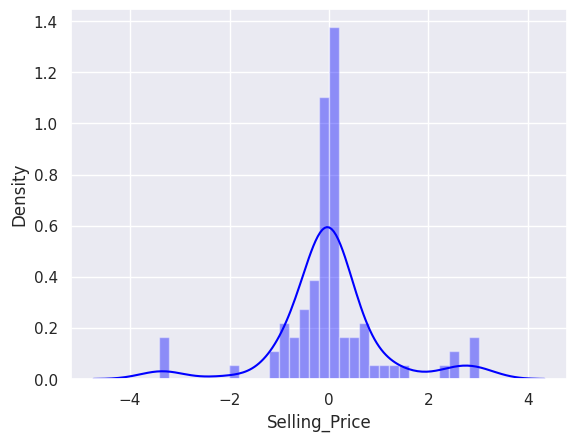

In [ ]:
# Calculating the error
y_pred = best_rf_model.predict(X_test)
Error = y_test - y_pred

sns.distplot(Error)

## Summary of RandomForestRegressor Assumptions:
* Non-parametric: Does not assume a specific form for the data.
* No Multicollinearity or Homoscedasticity Assumptions.
* No assumptions about linearity or distribution of errors.
* Assumes independent observations.
    - Visualize Data: Check for patterns or correlations that may suggest dependence between observations.
    - Statistical Tests: Perform tests like autocorrelation or Durbin-Watson to detect dependencies.

## Voting Regressor

***First we use GBR with hypertuning parameters to find best model parameters and then use it in Voting Regressor with DT & XGB***

***After we fit best model in GBR then we will use it in Voting Regressor with ExtraTrees & XGB***

In [ ]:
# 1. Define GradientBoostingRegressor Model after Grid Search  *gbr_search_cv.best_estimator
GBR = GradientBoostingRegressor (**gbr_search_cv.best_params_,random_state = 42)                                        #best_gbr_model
# 2. Define Decision Tree Regressor
EXTATREES  = ExtraTreesRegressor(random_state = 42)
# 3. Define XGB Regressor
XGB = XGBRegressor(learning_rate=0.5, n_estimators=200, max_depth =10)

***Buile VotingRegressorModel***

In [ ]:
VotingRegressorModel = VotingRegressor([('GBR', GBR), ('EXTATREES', EXTATREES), ('XGB',XGB)])
VotingRegressorModel.fit(X_train,y_train)

VotingRegressor(estimators=[('GBR',
                             GradientBoostingRegressor(loss='huber',
                                                       max_depth=9,
                                                       max_features=1.0,
                                                       min_samples_split=4,
                                                       n_estimators=700,
                                                       random_state=42,
                                                       subsample=0.8)),
                            ('EXTATREES', ExtraTreesRegressor(random_state=42)),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=N...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.5, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))])

In [ ]:
model_evaluate(VotingRegressorModel ,X_train ,X_test ,y_train ,y_test ,'VotingRegressor')

     Actual  Predicted
281    8.99   9.418571
265    8.35   8.746580
164    0.45   0.428437
9      7.45   7.229095
77     1.50   2.660928


***Evaluate model by use cross_validate***

In [ ]:
model_evaluate_use_Cross_validate(VotingRegressorModel,False)

Fit Times (seconds): [ 9.83461714 10.16504574  9.68413091 10.14203119  9.8991189  10.31161118]


In [ ]:
print("score_test=", VotingRegressorModel.score(X_test , y_test)*100)
print("score_train=", VotingRegressorModel.score(X_train , y_train)*100)

score_test= 98.54114243230978
score_train= 99.99999859874819


## Stacking Regressor

***After we fit best model in Random Forest then we will use it in Stacking Regressor with Best GBR Model & ExtraTrees & Bagging Regressor & Final estimator Ridge***

In [ ]:
# 1. Define GradientBoostingRegressor
GBR = best_gbr_model
# 2. Define GAGGING Regressor
GAGGINGREG = BaggingRegressor(random_state = 42)
# 3. Define EXTRATREESRegressor
EXTATREESREG  = ExtraTreesRegressor(random_state = 42)
# 4. Define RandomForestRegressor
RANDFORESTREG = RandomForestRegressor(random_state=42)

# Define the stacking model
estimators = [
    ('RANDFORESTREG',RANDFORESTREG),
    ('EXTATREESREG',EXTATREESREG),
    ('GAGGINGREG',GAGGINGREG),
    ('GBR',GBR)
  ]
# Use Ridge as the final estimator (meta-model)
Stacking_regressor = StackingRegressor(estimators ,final_estimator = Ridge() ,cv = 10 ,n_jobs = -1)
Stacking_regressor.fit(X_train,y_train)

StackingRegressor(cv=10,
                  estimators=[('RANDFORESTREG',
                               RandomForestRegressor(max_depth=8,
                                                     min_samples_split=4,
                                                     n_estimators=500)),
                              ('EXTATREESREG',
                               ExtraTreesRegressor(random_state=42)),
                              ('GAGGINGREG', BaggingRegressor(random_state=42)),
                              ('GBR',
                               GradientBoostingRegressor(loss='huber',
                                                         max_depth=9,
                                                         max_features=1.0,
                                                         min_samples_split=4,
                                                         n_estimators=700,
                                                         random_state=42,
                                                         subsample=0.8))],
                  final_estimator=Ridge(), n_jobs=-1)

In [ ]:
model_evaluate(Stacking_regressor ,X_train ,X_test ,y_train ,y_test ,'StackingRegressor')

     Actual  Predicted
281    8.99      10.00
265    8.35       9.20


In [ ]:
model_evaluate_use_Cross_validate(Stacking_regressor,False)

Fit Times (seconds): [117.29164767 115.81092715 121.67662382 119.18545556 119.18126464
 115.18799019]


## ***Second we build Models that Generally Require Scaling Data (LR ,KNN ,Polynomil Regression)***

## 1 - LinearRegression

In [21]:
target = 'Selling_Price'
X = df_car.drop(labels = target ,axis = 'columns')
y = df_car[target]

In [22]:
X[5:10]

Age  Present_Price  Kms_Driven  Owner  Fule_Type_Diesel  Fule_Type_Petrol  \
5    1           9.83        2071      0                 1                 0   
6    4           8.12       18796      0                 0                 1   
7    4           8.61       33429      0                 1                 0   
8    3           8.89       20273      0                 1                 0   
9    4           8.92       42367      0                 1                 0   

   Seller_Type_Individual  Transmission_Manual  
5                       0                    1  
6                       0                    1  
7                       0                    1  
8                       0                    1  
9                       0                    1

In [23]:
print(X.shape)
print(y.shape)

(299, 8)
(299,)


In [24]:
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size = 0.3 ,random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(209, 8)
(90, 8)
(209,)
(90,)


***Scaling data by use StandardScaler***

In [25]:
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [26]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled ,y_train)

LinearRegression()

In [27]:
Model_Component = pd.DataFrame(data = np.append(linear_reg.intercept_ ,linear_reg.coef_) ,
                                   index = ['Intercept']+[col+" Cof_" for col in X.columns] ,
                                                                                     columns = ['Value'])
Model_Component.sort_values(by = 'Value' ,ascending = False).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

#### model evaluate

In [28]:
model_evaluate(linear_reg ,X_train_scaled ,X_test_scaled ,y_train ,y_test ,'Linear Reg')

     Actual  Predicted
206     7.9   6.514572
188     0.2  -2.946079
12      7.5   6.507373
219     4.5   3.926997
237     2.0   2.650829


In [ ]:
Model = LinearRegression()
model_evaluate_use_Cross_validate(Model,True)

Fit Times (seconds): [0.01062274 0.00590682 0.00609803 0.00544667 0.00529289 0.00674987]


***Visualize the comparison between the predicted and original Selling Price***

In [ ]:
def Comparison_predicted_vs_original_data(model ,X_test ,y_test):
    y_predicted = model.predict(X_test)
    plt.figure(figsize = (15,6) ,dpi = 200)
    plt.plot(y_predicted ,'#32CD32',label='Predicted Selling Price')
    plt.plot(y_test.values ,'#FF00FF',label='Original Selling Price')
    plt.title('Comparison between the predicted vs. original Selling Price',fontsize = 15)
    plt.xlabel('Index',fontsize = 12)
    plt.ylabel('Selling_Price',fontsize = 12)
    plt.legend(loc='upper right')
    plt.show()

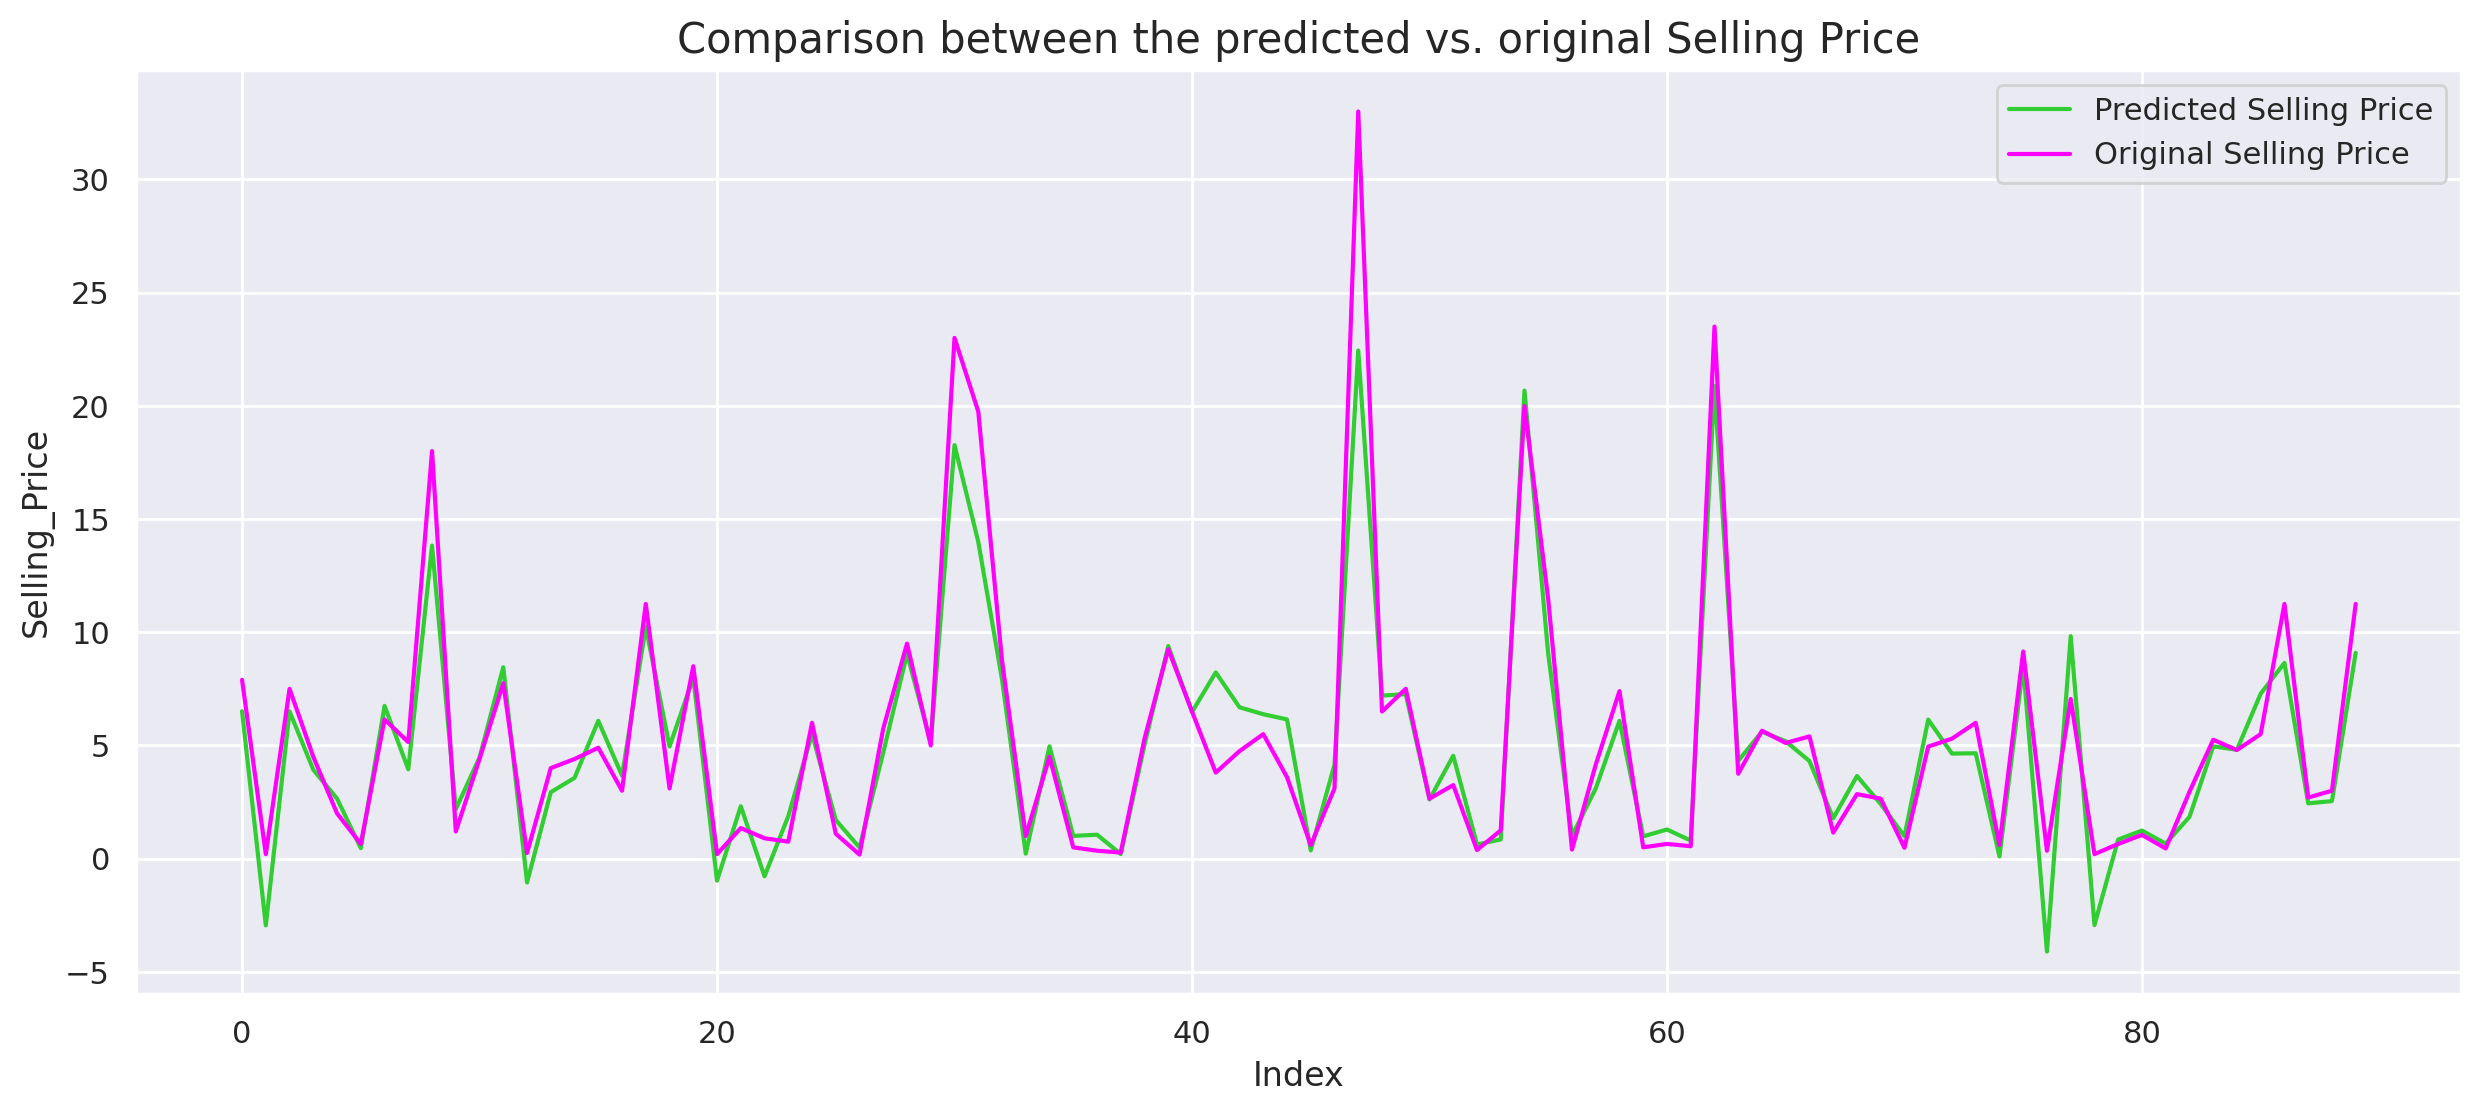

In [ ]:
Comparison_predicted_vs_original_data(linear_reg ,X_test_scaled ,y_test)

## Evaluate By Croos Validate

***To ensure that the model generalizes well, it's important to evaluate its performance using cross-validation. This will give you
an idea of how well your model is expected to perform on unseen data.***

In [29]:
Pipline = make_pipeline(StandardScaler() ,LinearRegression())
K_Fold = KFold(n_splits = 6 ,shuffle = True ,random_state = 0)
Scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(Pipline ,X ,y ,scoring = Scoring ,cv = K_Fold ,return_train_score = True)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std  =  (-result['test_neg_mean_absolute_error']).std()

MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std  =  (-result['test_neg_mean_squared_error']).std()

RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std  = (-result['test_neg_root_mean_squared_error']).std()

R2_Score_mean = result['test_r2'].mean()
R2_Score_std  = result['test_r2'].std()

Fit_time = result['fit_time']
#Array of fit times for each fold.
print("Fit Times (seconds): {}".format(Fit_time))
pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score']).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

Fit Times (seconds): [0.01179409 0.00796008 0.00822186 0.00916529 0.0078783  0.00759077]


- ***The filnal model performance is the average of the scors all folds.***
- ***The linear regression model obtained R2-score of %85.57 using 6-fold cross-validation.***
- ***Pipeline is a great way to prevent data leakage as it ensures that the appropriate method is performed on the correct data subset.***
- ***This is ideal for using in cross-validation since it ensures that only the training folds `KFold-1` are used when performing fit and the test set (validation set) is used only for calculating the accuracy score in each iteration of cross-validation.***

## Assumption

***1. linearity***

In [30]:
def residuals(model ,X_test ,y_test):
    '''
    Creates predictions on the features with the model and calculates residuals.
    '''
    y_pred = model.predict(X_test)
    df_residuals = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
    df_residuals['Residuals'] = np.abs(df_residuals['Actual']) - np.abs(df_residuals['Predicted'])
    return df_residuals

***To detect nonlinearity, we can check:***

Plots of actual vs. predicted values -> The desired outcome is that points are symmetrically distributed around a diagonaline
e
Plots of residuals vs. predicted values -> The desired outcome is that points are symmetrically distributed aroun  a horizontal l
***In both cases we should have an almost constant variance***nce.

In [31]:
def Check_linear_assumption(model ,X_test ,y_test):
    df_residuals = residuals(model ,X_test ,y_test)

    fig ,ax = plt.subplots(nrows = 1 ,ncols = 2 ,figsize = (15,5) ,dpi = 100)
    sns.regplot(x = 'Predicted' ,y = 'Actual' ,data =df_residuals ,scatter_kws = {'color':'blue','s' :40} ,
                                                  line_kws = {'color':'red','ls':'--' ,'lw':2.5} ,lowess = True ,ax = ax[0])
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)

    sns.regplot(x = 'Predicted' ,y = 'Residuals' ,data =df_residuals ,scatter_kws = {'color':'blue','s' :40} ,
                                                  line_kws = {'color':'red','ls':'--' ,'lw':2.5} ,lowess = True ,ax = ax[1])
    ax[1].set_title('Residual vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residual', fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

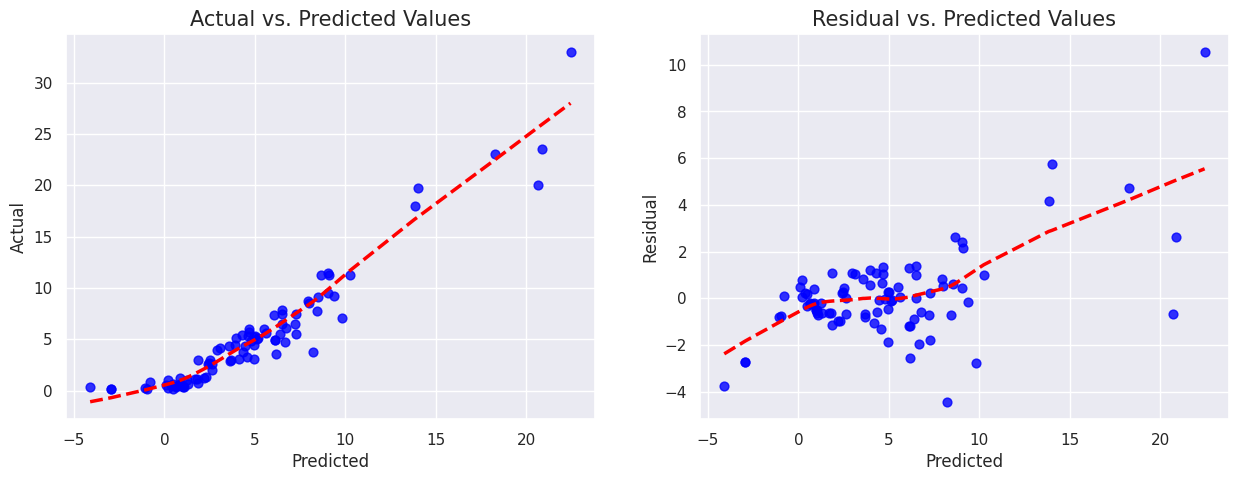

In [ ]:
Check_linear_assumption(linear_reg ,X_test_scaled ,y_test)

- ***Conclusion:***
  - ***The inspection of the plots shows that the linearity assumption is not satisfied.***

***Assumption 2 - Normality***

***To investigate this assumption we can check:***

- Anderson-Darling test
- Check residuals histogram
- Quantile-Quantile probability plot -> **plotting the residuals vs. the order of statistic**

In [32]:
def Check_normality_assumption(model ,X_test ,y_test ,alpha_value=0.05):
    # Get residuals
    df_residuals = residuals(model ,X_test ,y_test)

    # Anderson-Darling test
    ad_statistic, p_value = normal_ad(df_residuals['Residuals'])
    print(f'Anderson-Darling Test Statistic: ', np.round(ad_statistic,6))
    print(f'p-value: ',"{:.6e}".format(p_value))

    # Interpretation
    print(f'Check normality assumption using Anderson-Darling test Way 1')
    alpha_value = 0.05
    if p_value < alpha_value:
        print(f"The data does not come from a normal distribution. Assumption not satisfied")
    else:
        print(f"The data comes from a normal distribution. Assumption satisfied")

    # Way 2
    result = stats.anderson(df_residuals['Residuals'] ,dist = 'norm')
    # Anderson output result like
    '''
       AndersonResult(statistic=0.4252905907819695,
       critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]),
       significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]),
       fit_result=  params: FitParams(loc=-0.0561952614020469, scale=0.9974806167774968)
       success: True
       message: '`anderson` successfully fit the distribution to the data.')
    '''
    # Interpretation
    count = 0
    for i in range(len(result.critical_values)):
        SL, CV = result.significance_level[i], result.critical_values[i]
        if result.statistic < CV:
            count+=1

    print(f'Check normality assumption using Anderson-Darling test Way 2')
    if count==len(result.critical_values):
         print(f"Data seems to come from a normal distribution. Assumption satisfied")
    else:
         print(f"Data does not seem to come from a normal distribution.Assumption not satisfied")


     # Residuals Histogram
    fig , ax = plt.subplots(nrows = 1 ,ncols = 2 ,figsize = (15,6) ,dpi=150)
    graph = sns.histplot(data = df_residuals , x = 'Residuals' , kde = True ,ax = ax[0] , bins=15,
                            color = 'blue' , edgecolor = 'none' ,alpha = 0.4 , line_kws = {'ls':'--','lw' : 2.5})
    ax[0].set_title('Distribution of Residuals',fontsize = 15)
    ax[0].set_xlabel('Residuals' ,fontsize = 12)
    ax[0].set_ylabel('Count' ,fontsize = 12)

    for j ,p in enumerate(graph.patches):
        ax[0].annotate('{}'.format(p.get_height()) ,(p.get_x() + p.get_width()/2 ,p.get_height()+.75) ,
          ha='center' ,fontsize=10 ,fontweight='bold')
    textstr = '\n'.join((
       r'$\mu = %.2f$' %df_residuals['Residuals'].mean(),
       r'$\sigma =%.2f$' %df_residuals['Residuals'].std()
    ))
    ax[0].text(0.6,0.9,textstr ,transform = ax[0].transAxes ,fontsize = 15 ,verticalalignment ='top'
               ,bbox = dict(boxstyle = 'round',facecolor = 'lightblue' ,edgecolor = 'black',pad = 0.5))
    '''
        If you need to Calculate theoretical quantiles from a standard normal distribution
        Step 1: Get residuals and Sort the residuals
        residuals_sorted = np.sort(residuals1['Residuals'])
        Step 2: These will be used to check if residuals are normally distributed
        theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(residuals_sorted)))
        then you can use plt.scatter(theoretical_quantiles, residuals_sorted, color='blue', label="Residuals")
        Adding a line y=x for comparisonplt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--', label="Normal Distribution")
    '''
    # Or
    # QQ plot(Quantile-Quantile plot)
    stats.probplot(df_residuals['Residuals'] ,dist = 'norm' ,plot = ax[1])
    ax[1].set_title('Residuals Q-Q Plot', fontsize = 15)
    ax[1].set_xlabel('Theoretical Quantiles' ,fontsize = 12)
    ax[1].set_ylabel('Values' ,fontsize = 12)
    ax[1].get_lines()[0].set_markerfacecolor('blue')
    ax[1].get_lines()[1].set_color('orange')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'],loc='upper left')
    plt.grid(True)
    plt.show()

Anderson-Darling Test Statistic:  3.987043
p-value:  5.271453e-10
Check normality assumption using Anderson-Darling test Way 1
The data does not come from a normal distribution. Assumption not satisfied
Check normality assumption using Anderson-Darling test Way 2
Data does not seem to come from a normal distribution.Assumption not satisfied


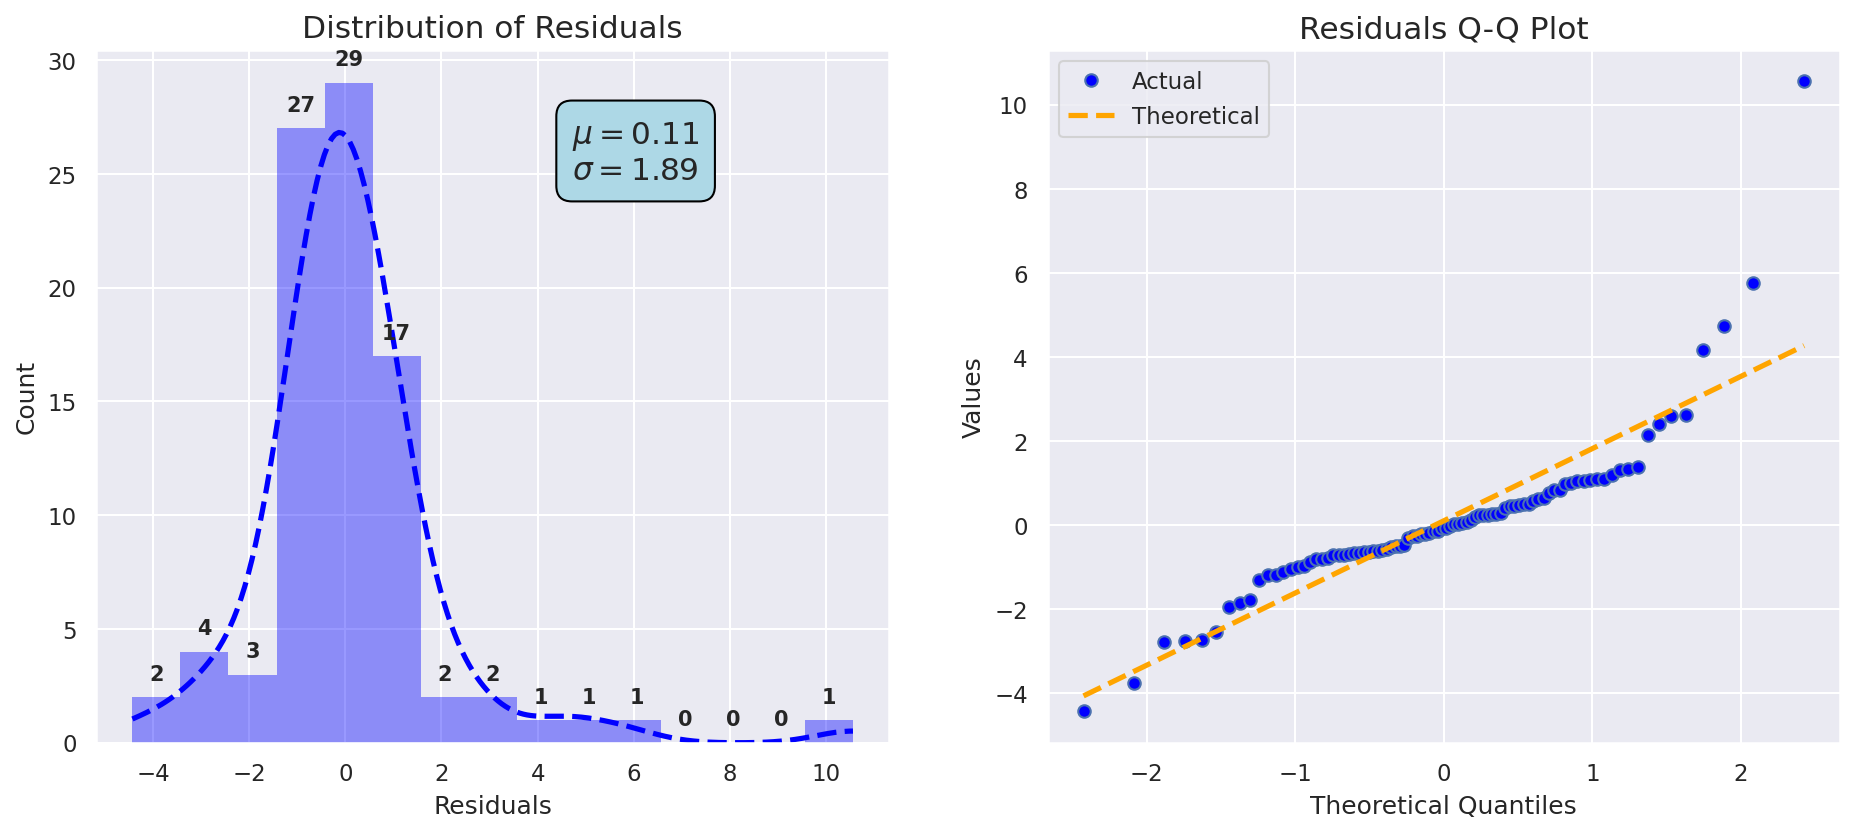

In [33]:
Check_normality_assumption(linear_reg ,X_test_scaled ,y_test ,alpha_value=0.05)

- ***Conclusion:***
  - ***The inspection of the plots shows that the Normality assumption is not satisfied.***

## Assumption 3 : No Perfect Multicollinearity

***1. "No Perfect Multicollinearity" means that none of the independent variables in the model is an exact linear combination of the others. This is a basic assumption in most linear regression models to ensure that the model can be properly estimated.***

* **Multicollinearity can be detected using several methods, including:**
  - `Condition number:` A high condition number may indicate multicollinearity.
  - `Variance Inflation Factor (VIF):` A high VIF indicates high multicollinearity.
  - `Correlation matrix:` Checking the correlation between independent variables to identify highly correlated pairs(Step 7).

***2. Is it necessary first make scaler to data before find VIF or Condition Number when we dedicte NO perfect Multicollinearity?***
* No, it is not necessary to scale the data before calculating the Variance Inflation but recommended when calculate condition number.
* For VIF is `scale-independent `, meaning that scaling the data (such as through standardization or normalization) will not affect    the VIF values.
    * The Variance Inflation Factor (VIF) is based on the correlation between variables, and `correlation is also scale-independent`.
* For the Condition Number, scaling may be recommended to avoid numerical instability, especially when the variables have different units or magnitudes.
    * The Condition Number is based on eigenvalues from matrix _`which are scale-dependent`_ decomposition, and `it can be sensitive to scaling`, as the magnitudes of variables affect the matrix operations.

***3. How do we interpret VIF values?***
 - ***For VIF:***
   - VIF = 1: No correlation between the predictor and other variables.
   - 1 < VIF < 5: Moderate multicollinearity.
   - VIF > 5: High multicollinearity that might require investigation.
   - VIF > 10: A very high level of multicollinearity, indicating that the variable is highly collinear with others, and it could affect the regression analysis.
   
- ***For Condition Number:***
  - Condition Number < 10: NO multicollinearity.
  - Condition Number between 10 and 30 : Moderate multicollinearity.
  - Condition Number > 30: High multicollinearity, indicating potential problems with the model.

- ***Calculate Variance inflation factor (VIF)***
  - First we not need make Scaler For data:
  - The formula for VIF is:
<p align="center">
\[
VIF(X_i) = \frac{1}{1 - R_i^2}
\]
</p>

In [34]:
def Calculate_VIF(data_frame):
    vif_data = pd.DataFrame()
    vif_data['Features'] = data_frame.columns                                        # num cols
    vif_data['VIF'] = [variance_inflation_factor(data_frame.values,i) for i in range(data_frame.shape[1])]
    return vif_data.round(2)

- ***Calculate Conditional Number:***
  - First we must make Scaler For data.
  - The formula for conditional number.
  <p cnter>
  \[
\kappa(X) = \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}}
\]
    </p>


In [35]:
#The condition number is calculated for the entire matrix by taking the ratio of the largest singular value to the smallest singular value (from Singular Value Decomposition).
def Calculate_Condition_number(X):
    df_scaled = X.copy()
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(df_scaled),columns = df_scaled.columns)
    condtion_number = np.linalg.cond(X_scaled)
    return condtion_number

In [36]:
def Check_Multicollinearity_assumption(X):
    Vif_without_scaling = Calculate_VIF(X)
    possible_multicollinearity = sum([1 for vif_value in Vif_without_scaling['VIF'] if vif_value > 10])
    definite_multicollinearity = sum([1 for vif_value in Vif_without_scaling['VIF'] if vif_value > 100])

    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
             print(f'NO multicollinearity.Assumption satisfied.\n')
        else:
            print(f'Moderate multicollinearity.Assumption possibly satisfied.\n')
    else:
         print(f'High multicollinearity.Assumption not satisfied.\n')

    #Way 2
    Cond_num = Calculate_Condition_number(X)
    print(f"Condition Number value : ",np.round(Cond_num ,3))
    if Cond_num < 10:
        print(f'NO multicollinearity. Assumption satisfied.\n')
    elif Cond_num >= 10 and Cond_num <=30:
        print(f'Moderate multicollinearity. Assumption possibly satisfied.\n')
    else:
         print(f'High multicollinearity. Assumption not satisfied.\n')

    return  Vif_without_scaling.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

In [37]:
Check_Multicollinearity_assumption(X)

1 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Moderate multicollinearity.Assumption possibly satisfied.

Condition Number value :  11.903
Moderate multicollinearity. Assumption possibly satisfied.



***There is possible multicollinearity for Fuel_Type_Petrol.***
* **To avoid this possible multicollinearity**
  - **We can delete Fuel_Type_Petrol.**
  - **Using PCA -> Reducing features to a smaller set of uncorrelated components.**


## Assumption 4 : No Autocorrelation of Residuals

**1. No Autocorrelation of Residuals**
  - Autocorrelation of residuals refers to the correlation of residual errors with each other over time or observations. In a well-specified model, the residuals should be independent of each other. Autocorrelation implies that the residuals are dependent, which violates the assumption of independence in linear regression.

**2. How can we detect autocorrelation of residuals?**
* A common method to detect autocorrelation is the **Durbin-Watson** (DW) test. This test returns a statistic between `0 and 4`:
  - A value near 2 suggests no autocorrelation.
  - A value near 0 suggests positive autocorrelation.
  - A value near 4 suggests negative autocorrelation.

In [38]:
def Cheack_autocorrelation_assumption(model ,X_test ,y_test):

    df_residuals = residuals(model ,X_test ,y_test)

    Durbin_watson = durbin_watson(df_residuals['Residuals'])

    print(f'Durbin weston test value = {np.round(Durbin_watson,5)}')

    if Durbin_watson < 1.5:
        print(f'Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif Durbin_watson > 2:
         print(f'Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print(f'No Autocorrelation. Assumption satisfied.', '\n')

In [39]:
Cheack_autocorrelation_assumption(linear_reg ,X_test_scaled ,y_test)

Durbin weston test value = 1.82272
No Autocorrelation. Assumption satisfied. 



- ***Conclusion:***
  - ***The Durbin weston test value shows that no Autocorrelation assumption is satisfied.***

## Step 8.7.5: Assumption 5 - Homoscedasticity

**1. What is the assumption of homoscedasticity in the context of regression analysis?**

   - The assumption of homoscedasticity in regression analysis means that the variance of the residuals (errors) is constant across all levels of the independent variable(s). This implies that no matter what value the independent variable takes, the spread of the errors remains the same.
   
**2. How can you check for homoscedasticity in your data?**
 * Visual Inspection:
   - Residuals vs. Fitted Values Plot (predicted values), as we show on linearity plot(graph 2).
 * Statistical Tests:
   - Breusch-Pagan Test or White tests
 * Scale-Location Plot:
   - Also known as a Spread-Location plot, this shows the square root of standardized residuals versus the fitted values. Ideally, it should show a horizontal line with equally spread points.
 * Influential Data:
   - Check leverage vs. residuals plot to detect outliers that could be influencing the variance.

**1. How do you interpret the Breusch-Pagan test?**
- Null Hypothesis (H0): Homoscedasticity (constant variance).
- Alternative Hypothesis (H1): Heteroscedasticity (non-constant variance).
   - If the p-value is less than 0.05, you reject the null hypothesis, which means there is evidence of heteroscedasticity.
   - If the p-value is greater than 0.05, you fail to reject the null hypothesis, suggesting homoscedasticity.

In [40]:
# Way 2 I will use Breusch-Pagan Test
X_test_without_const = X_test
X_test_without_const.head(2).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

In [41]:
def Cheack_Breusch_Pagan_Test(model ,X_test ,y_test):
    #optain residuals
    df_residuals = residuals(model ,X_test ,y_test)

    # Add constant term to X for ordinary least squares (OLS) regression in statsmodels
    X_test_with_constant = sm.add_constant(X_test_without_const)

    # Perform the Breusch-Pagan test
    Test_results = het_breuschpagan(df_residuals['Residuals'], X_test_with_constant)

    # The Breusch-Pagan test returns several values; we'll focus on the p-value
    bp_test_stat, bp_p_value, f_test_stat, f_p_value = Test_results

    # bp_p_value
    print(f'Breusch-Pagan test p-value: ',"{:.6e}".format(bp_p_value))

    # Interpretation
    if bp_p_value < 0.05:
        print(f"Heteroscedasticity detected (variance is not constant).")
    else:
        print(f"Homoscedasticity detected (constant variance).")

    return X_test_with_constant

In [42]:
def Cheack_homoscedasticity_assumption(model ,X_test ,y_test):

    df_results = residuals(model ,X_test ,y_test)

    print('The orange line should be flat.\n')
    fig = plt.figure(figsize=(8,6), dpi=70)                   # make none linear line
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,   # drow line with data If true
                               color='blue', line_kws={'color':'orange','ls':'--','lw':2.5},fit_reg = True)
    """plt.scatter(x='Predicted', y='Residuals', data=df_results)"""
    plt.axhline(y=0, color='red', lw=1)
    plt.title('Residuals vs. Predicted Values', fontsize=15)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.show()

    # Call Function that calculate Breusch-Pagan Test
    print('\n')
    X_test_with_constant = Cheack_Breusch_Pagan_Test(linear_reg ,X_test_scaled ,y_test)
    return X_test_with_constant.head(2).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

The orange line should be flat.



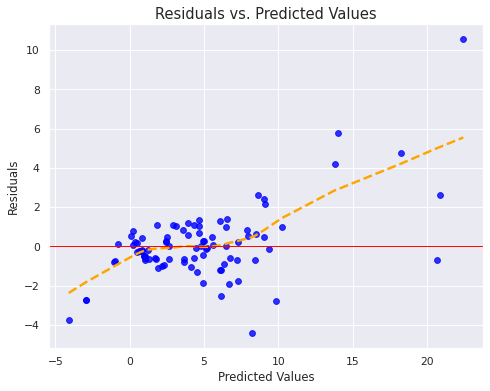



Breusch-Pagan test p-value:  2.958321e-05
Heteroscedasticity detected (variance is not constant).


In [43]:
Cheack_homoscedasticity_assumption(linear_reg ,X_test_scaled ,y_test)

**After appling `the Breusch pagan test` also assumption of homoscedasticity is not satisfied.**
* Potential solutions
  - Outlier removal
  - Appllying log transformation of independent variables
  - Applying polynomial regression

***To solve the problems that appeared in the model and the inability to achieve the conditions and assumptions, you will perform a set   of steps to solve each specific assumption and check its existence again.***
   * To satisfy the multicollinearity assumption, we `remove the Fuel_Type_Petrol feature`.
   * Then, according to the pattern in the plot of the residuals vs. predicted values, we will use `box-cox transformation` on the entire dataset.
   * By applying `polynomial regression`, we will try to `improve the satisfaction of homoscedasticity and normality of residuals`.
   * Finally, we will use `regularization` to reduce the probability of the model to be `overfit`.

- ***First step drop Fuel_Type_Petrol to satisfy multicollinearity assumption.***

STEP : ***APPLYING BOX COX TRANSFORMATION***

- The Box-Cox transformation is a power transformation used to stabilize variance and make the data more normally distributed.
- Note : Box cox is flexible and should be uesed when you are unsure about exact from transformation needed. it's used when we need flexibility and the ability to transform data for better model performance, Box-Cox is more suitable. It allows different levels of transformation.

**Equation:**
<p align="center">\[
y(\lambda) =
\begin{cases}
\frac{(y \lambda) - 1}{\lambda} & \text{if } \lambda \ne 0, \\
\log(y) & \text{if } \lambda = 0.
\end{cases}
\]
</p>


1. Handling non-positive values:
    - Ensure that all values in `X_train` and `y_train` are positive before applying `the Box-Cox transformation` .
`Adding +1 is a good workaround`.
2. Handling edge cases:
   - Some columns may `not require Box-Cox transformation`, especially if their data is already normally distributed. You can check for this using `skewness tests` before applying Box-Cox.
3. Data leakage prevention:
   - Make sure that the Box-Cox transformation and lambda fitting are performed only on `training data` and `the same lambda is applied to the test data` when making predictions.

In [ ]:
dr = df_car.copy()
dr.head(2)

Age  Selling_Price  Present_Price  Kms_Driven  Owner  Fule_Type_Diesel  \
0    5           3.35           5.59       27000      0                 0   
1    6           4.75           9.54       43000      0                 1   

   Fule_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1

In [44]:
del df_car['Fule_Type_Petrol']
# Or removed_column = df_car.pop('B')
# Or df_car.drop(labels = 'Fuel_Type_Petrol',axis = 'columns')

In [45]:
df_car.head(2)

Age  Selling_Price  Present_Price  Kms_Driven  Owner  Fule_Type_Diesel  \
0    5           3.35           5.59       27000      0                 0   
1    6           4.75           9.54       43000      0                 1   

   Seller_Type_Individual  Transmission_Manual  
0                       0                    1  
1                       0                    1

In [ ]:
#removed_column = dr.pop('Fule_Type_Petrol')

In [ ]:
dr.head(1)

Age  Selling_Price  Present_Price  Kms_Driven  Owner  Fule_Type_Diesel  \
0    5           3.35           5.59       27000      0                 0   

   Seller_Type_Individual  Transmission_Manual  
0                       0                    1

In [46]:
X_train1 = X_train
X_test1  = X_test
y_train1 = y_train
y_test1  = y_test


###  APPLYING BOX COX TRANSFORMATION

In [47]:
X_train.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Owner', 'Fule_Type_Diesel',
       'Fule_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [48]:
df_car.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fule_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

***First we git fitted lambda from train data for all columns in dataframe***

In [49]:
from scipy import stats
# why df_car because we drop from it outliers
fitted_lambda = pd.Series(np.zeros(len(df_car.columns), dtype = np.float64) ,index = df_car.columns)

'''we work only on train data in X , y only'''
# For target train column = y_train
y_train ,fitted_lambda['Selling_Price'] = stats.boxcox(y_train+1)
# For x_train columns
for col in X_train.columns:
    X_train[col] ,fitted_lambda[col] = stats.boxcox(X_train[col]+1)

fitted_lambda

Age                       -0.360231
Selling_Price             -0.035121
Present_Price              0.078725
Kms_Driven                 0.350131
Owner                    -30.152326
Fule_Type_Diesel          -7.293622
Seller_Type_Individual    -2.570020
Transmission_Manual       14.351418
Fule_Type_Petrol           6.887121
dtype: float64

***Apply fiteed lambda for test data***

In [50]:
# for target test column = y_test
y_test = stats.boxcox(y_test+1,fitted_lambda['Selling_Price'])
# for X_test columns
for col in X_test.columns:
    X_test[col] = stats.boxcox(X_test[col]+1,fitted_lambda[col])

In [51]:
print(type(y_train))

<class 'numpy.ndarray'>


In [52]:
def prepering_boxcox_dataframe(X_train ,X_test ,y_train ,y_test):
    '''First we will make y_train & y_test as dataframe beacuse there type are <class 'numpy.ndarray'>'''
    y_train = pd.DataFrame(data = y_train ,index = X_train.index ,columns = ['Selling_Price'])
    y_test  = pd.DataFrame(data = y_test ,index = X_test.index ,columns = ['Selling_Price'])

    '''Second We will merge X_train & X_test in one dataframe Also y_train & y_test in one dataframe'''
    X_boxcox = pd.concat([X_train,X_test])
    y_boxcox = pd.concat([y_train ,y_test])

    '''Therd We will merge X_boxcox & y_boxcox in one dataframe'''
    # axis=1 means joining DataFrames side by side
    df_boxcox = pd.concat([X_boxcox ,y_boxcox] ,axis=1)
    df_boxcox.sort_index(inplace = True)

    return df_boxcox

In [53]:
df_boxcox = prepering_boxcox_dataframe(X_train ,X_test ,y_train ,y_test)
df_boxcox.head(2)

Age  Present_Price  Kms_Driven  Owner  Fule_Type_Diesel  \
0  1.320187       2.032688   98.846621    0.0          0.000000   
1  1.398824       2.587658  116.843735    0.0          0.136232   

   Fule_Type_Petrol  Seller_Type_Individual  Transmission_Manual  \
0         17.041492                     0.0          1456.437063   
1          0.000000                     0.0          1456.437063   

   Selling_Price  
0       1.432865  
1       1.696554

#### ***Drop Fule_Type_Petrol from boxcox dataframe***

In [54]:
df_boxcox.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Owner', 'Fule_Type_Diesel',
       'Fule_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual',
       'Selling_Price'],
      dtype='object')

In [55]:
'''
This will remove column Fule_Type_Petrol from boxcox and store its data in the variable removed_column.
Or del df_boxcox['Fule_Type_Petrol']
'''
removed_column = df_boxcox.pop('Fule_Type_Petrol')

In [56]:
df_boxcox.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Owner', 'Fule_Type_Diesel',
       'Seller_Type_Individual', 'Transmission_Manual', 'Selling_Price'],
      dtype='object')

***Visualizing Numerical variables the distribution of Numerical variables all had a lot of positive skewness as we see in step 5.4. In the following, we can see the change in the shape of the distribution of these variables after applying Box-Cox transformation:***

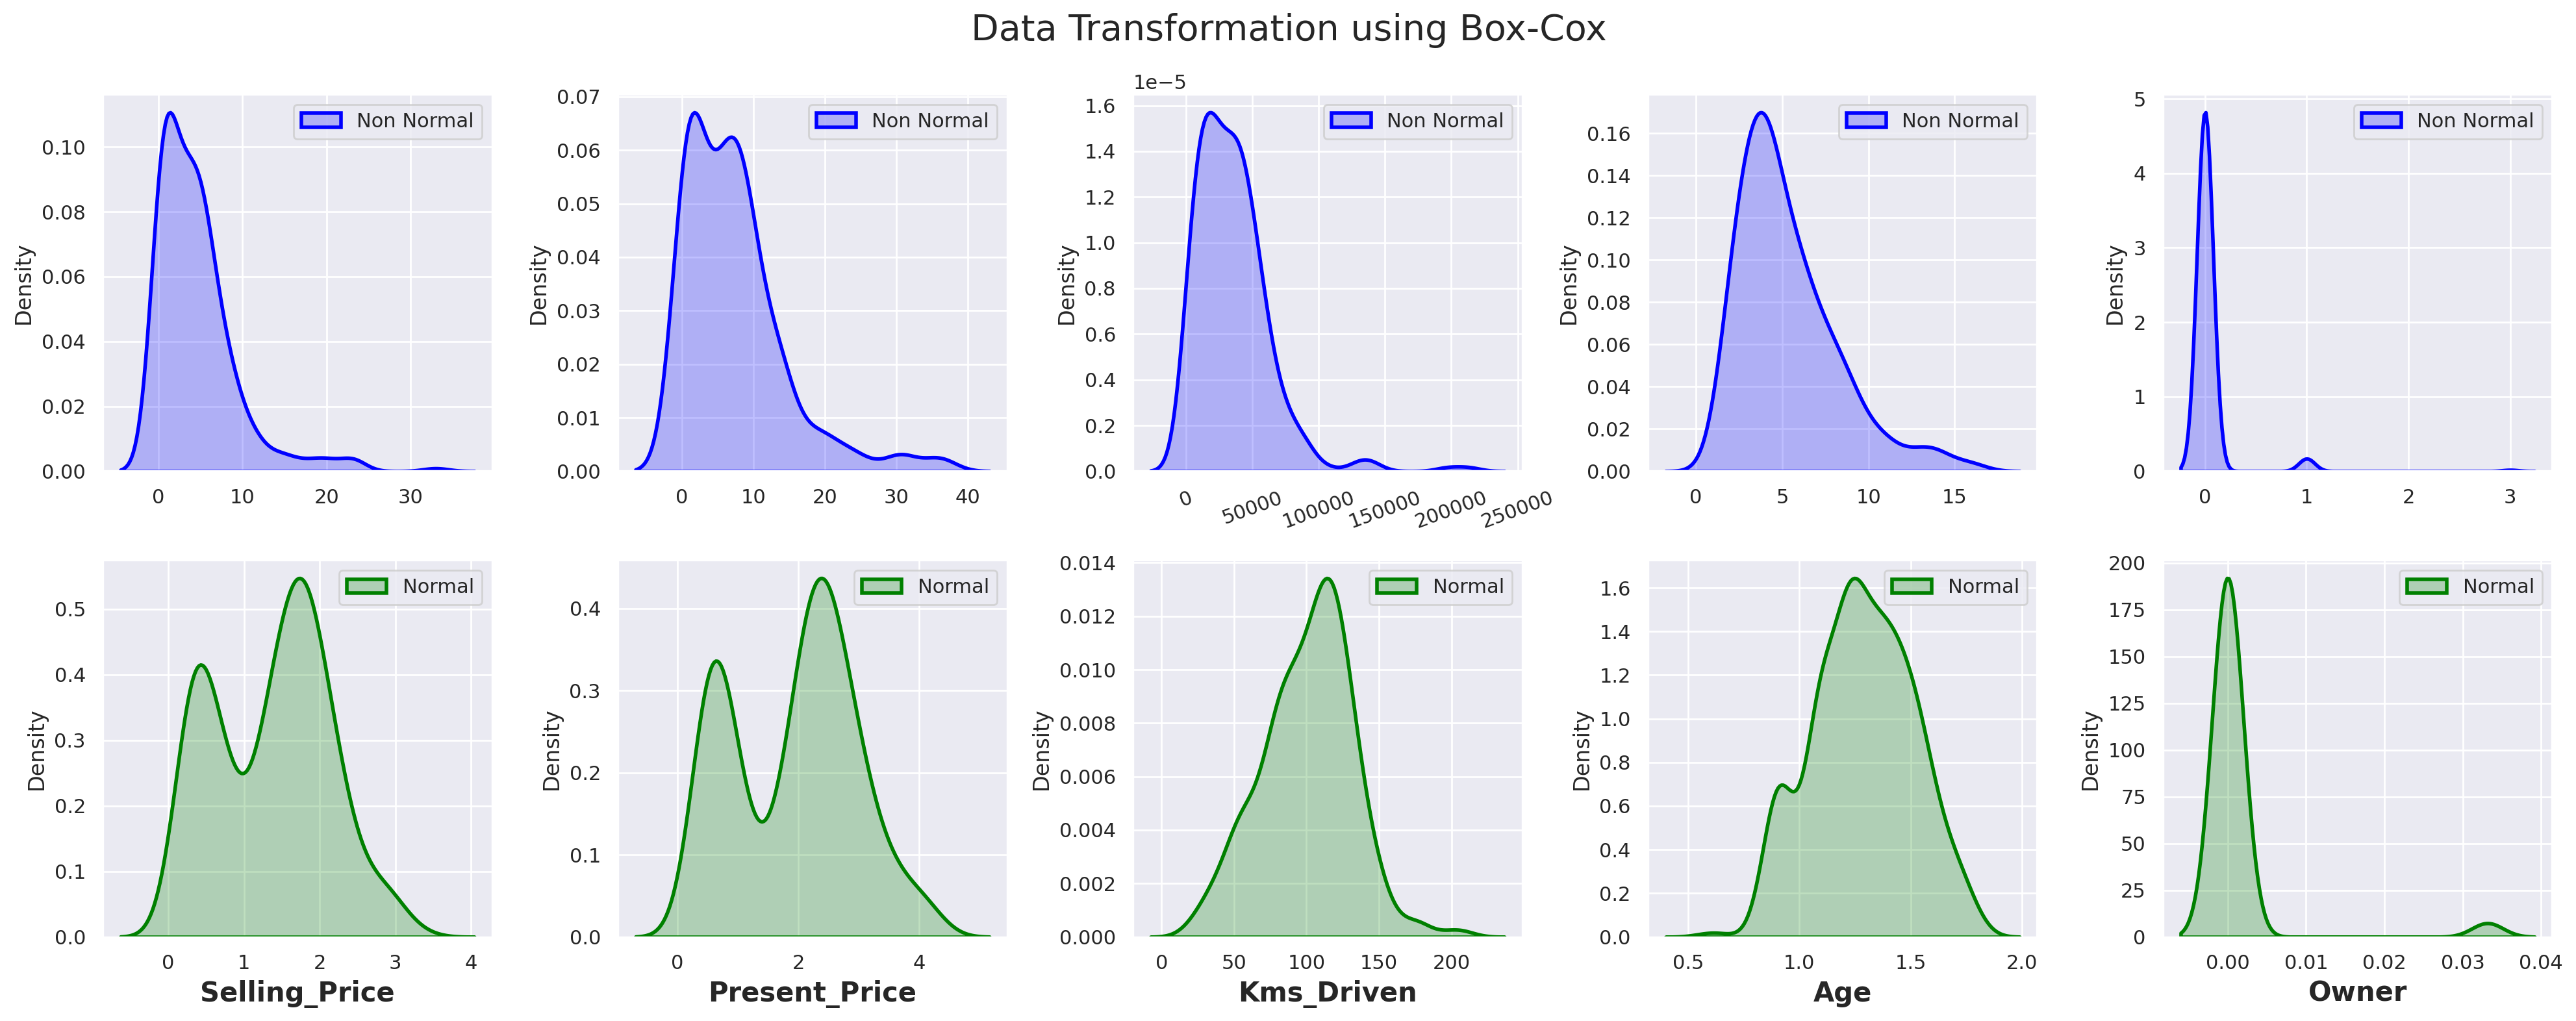

In [57]:
Color = ['blue','green']
flg ,ax = plt.subplots(nrows = 2,ncols = 5 ,figsize = (20,8) ,dpi=200)
Numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age' ,'Owner']

for i ,col in enumerate(Numerical_cols):
    sns.kdeplot(data = df_car[col] ,label = 'Non Normal' ,fill = True ,color = Color[0] ,linewidth = 2 ,ax = ax[0,i])
    sns.kdeplot(data = df_boxcox[col] ,label = 'Normal' ,fill = True ,color = Color[1] ,linewidth = 2 ,ax = ax[1,i])
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()

In [58]:
df_boxcox.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Owner', 'Fule_Type_Diesel',
       'Seller_Type_Individual', 'Transmission_Manual', 'Selling_Price'],
      dtype='object')

In [59]:
X_for_poly = df_boxcox.drop(labels = 'Selling_Price' ,axis = 'columns')
y_for_poly = df_boxcox['Selling_Price']

In [60]:
X_for_poly.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Owner', 'Fule_Type_Diesel',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [61]:
print(len(X_for_poly.columns))
print(y.shape)

7
(299,)


In [66]:
def visualize2D(x, y, is_scatter=True, tite='x vs y'):
    if is_scatter:
        plt.scatter(x, y)
    else:
        plt.plot(x, y)
    plt.title(tite)
    plt.xlabel('degree')
    plt.ylabel('error')
    plt.grid()
    plt.show()

In [67]:
def learn_polynomial(x, y, degree=1):
    # learn polynomial
    poly = PolynomialFeatures(degree = degree ,include_bias=False)

    new_x = poly.fit_transform(x)

    model = LinearRegression()

    model.fit(new_x,y)

    pred = model.predict(new_x)
    error = metrics.mean_squared_error(y ,pred)
    return error ,model

In [68]:
def try_polynomial():
    errors = []
    degrees = []
    for deg in [1,2,3,4,5,6,7]:
        err,model = learn_polynomial(X,y,deg)
        #print(f'Degree {deg} has error {err} {abs(model.coef_).sum()} - {model.coef_}')
        errors.append(err)
        degrees.append(deg)
    visualize2D(degrees, errors ,is_scatter=False ,tite='Degree vs Error')

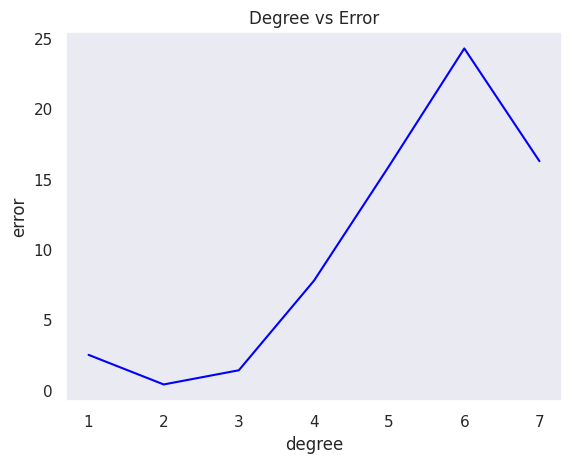

In [69]:
try_polynomial()

***Now box-cox transformation is applied on X and y. Next, we will add higher order features to the model. Build second ordered***

In [80]:
Poly_features = PolynomialFeatures(degree = 2 ,include_bias=False)
X_poly = Poly_features.fit_transform(X_for_poly)
X_poly = pd.DataFrame(data = X_poly ,columns = Poly_features.get_feature_names_out(X_for_poly.columns))
X_poly.head(3).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

In [81]:
poly_features_names = Poly_features.get_feature_names_out(X_for_poly.columns)
len(poly_features_names)

35

In [82]:
X_poly_train ,X_poly_test ,y_poly_train ,y_poly_test = train_test_split(X_poly ,y_for_poly ,test_size = 0.3 ,random_state=0)

In [83]:
print('X_poly_train shape: ', X_poly_train.shape)
print('X_poly_test shape: ', X_poly_test.shape)
print('y_poly_train shape: ', y_poly_train.shape)
print('y_poly_test shape: ',y_poly_test.shape)

X_poly_train shape:  (209, 35)
X_poly_test shape:  (90, 35)
y_poly_train shape:  (209,)
y_poly_test shape:  (90,)


In [84]:
Scaler = StandardScaler()
Scaler.fit(X_poly_train)

X_poly_train = Scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(data = X_poly_train ,columns = poly_features_names)

X_poly_test = Scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(data = X_poly_test ,columns = poly_features_names)

In [85]:
Poly_model = LinearRegression()
Poly_model.fit(X_poly_train ,y_poly_train)

LinearRegression()

In [86]:
Dataframe_poly = pd.DataFrame(data = np.append(Poly_model.intercept_ ,Poly_model.coef_) ,index = ['Intercept']+
            [col+' Coef.' for col in X_poly.columns] , columns = ['Value'])
Dataframe_poly.T

Intercept  Age Coef.  Present_Price Coef.  Kms_Driven Coef.  \
Value   1.333947      0.479             1.225509          0.007504   

       Owner Coef.  Fule_Type_Diesel Coef.  Seller_Type_Individual Coef.  \
Value     0.011083               -0.112554                     -0.022273   

       Transmission_Manual Coef.  Age^2 Coef.  Age Present_Price Coef.  ...  \
Value                  -0.045615    -0.394043                -0.671467  ...   

       Owner^2 Coef.  Owner Fule_Type_Diesel Coef.  \
Value       0.011083                     -0.011577   

       Owner Seller_Type_Individual Coef.  Owner Transmission_Manual Coef.  \
Value                           -0.084319                         -0.06287   

       Fule_Type_Diesel^2 Coef.  \
Value                 -0.112554   

       Fule_Type_Diesel Seller_Type_Individual Coef.  \
Value                                      -0.014648   

       Fule_Type_Diesel Transmission_Manual Coef.  \
Value                                   -0.009719   

       Seller_Type_Individual^2 Coef.  \
Value                       -0.022273   

       Seller_Type_Individual Transmission_Manual Coef.  \
Value                                          0.058328   

       Transmission_Manual^2 Coef.  
Value                    -0.045615  

[1 rows x 36 columns]

In [87]:
model_evaluate(Poly_model ,X_poly_train ,X_poly_test ,y_poly_train ,y_poly_test ,'Polynomial_Reg')

       Actual  Predicted
206  2.104240   2.045027
188  0.181739  -0.005778
12   2.061619   1.950075
219  1.654718   1.522048
237  1.077688   1.252716


In [88]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result2 = cross_validate(pipeline, X_for_poly ,y_for_poly, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result2['test_neg_mean_absolute_error']).mean()
MAE_std = (-result2['test_neg_mean_absolute_error']).std()
MSE_mean = (-result2['test_neg_mean_squared_error']).mean()
MSE_std = (-result2['test_neg_mean_squared_error']).std()
RMSE_mean = (-result2['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result2['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result2['test_r2'].mean()
R2_Score_std = result2['test_r2'].std()
R2_train_mean = result2['train_r2'].mean()
R2_train_std  = result2['train_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean,R2_train_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std,R2_train_std]},
         index=['MAE', 'MSE', 'RMSE' ,'R2-Score','R2_Train']).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

## Asumption

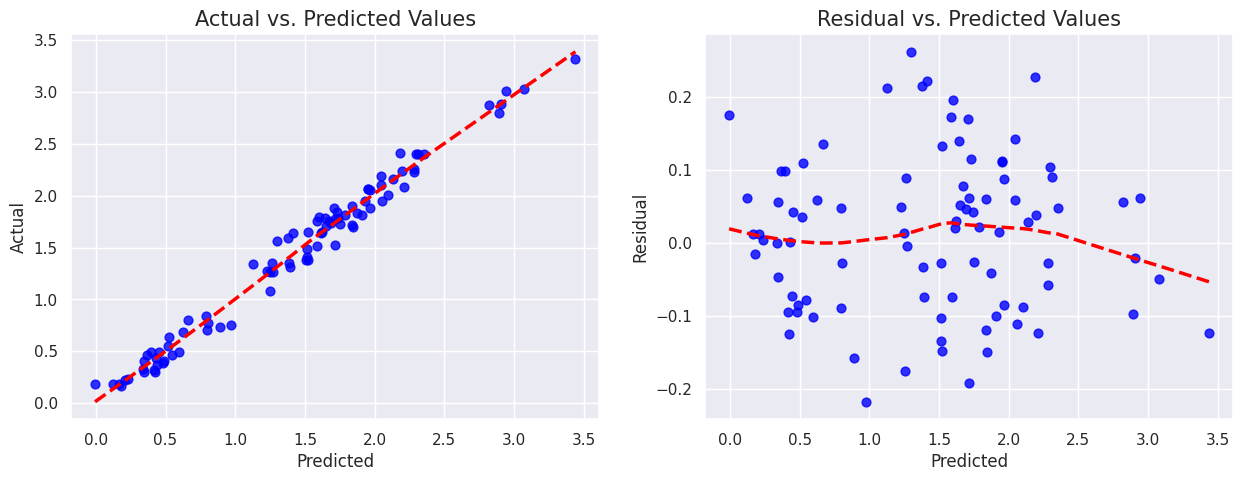

In [89]:
Check_linear_assumption(Poly_model ,X_poly_test ,y_poly_test)

Anderson-Darling Test Statistic:  0.355995
p-value:  4.508434e-01
Check normality assumption using Anderson-Darling test Way 1
The data comes from a normal distribution. Assumption satisfied
Check normality assumption using Anderson-Darling test Way 2
Data seems to come from a normal distribution. Assumption satisfied


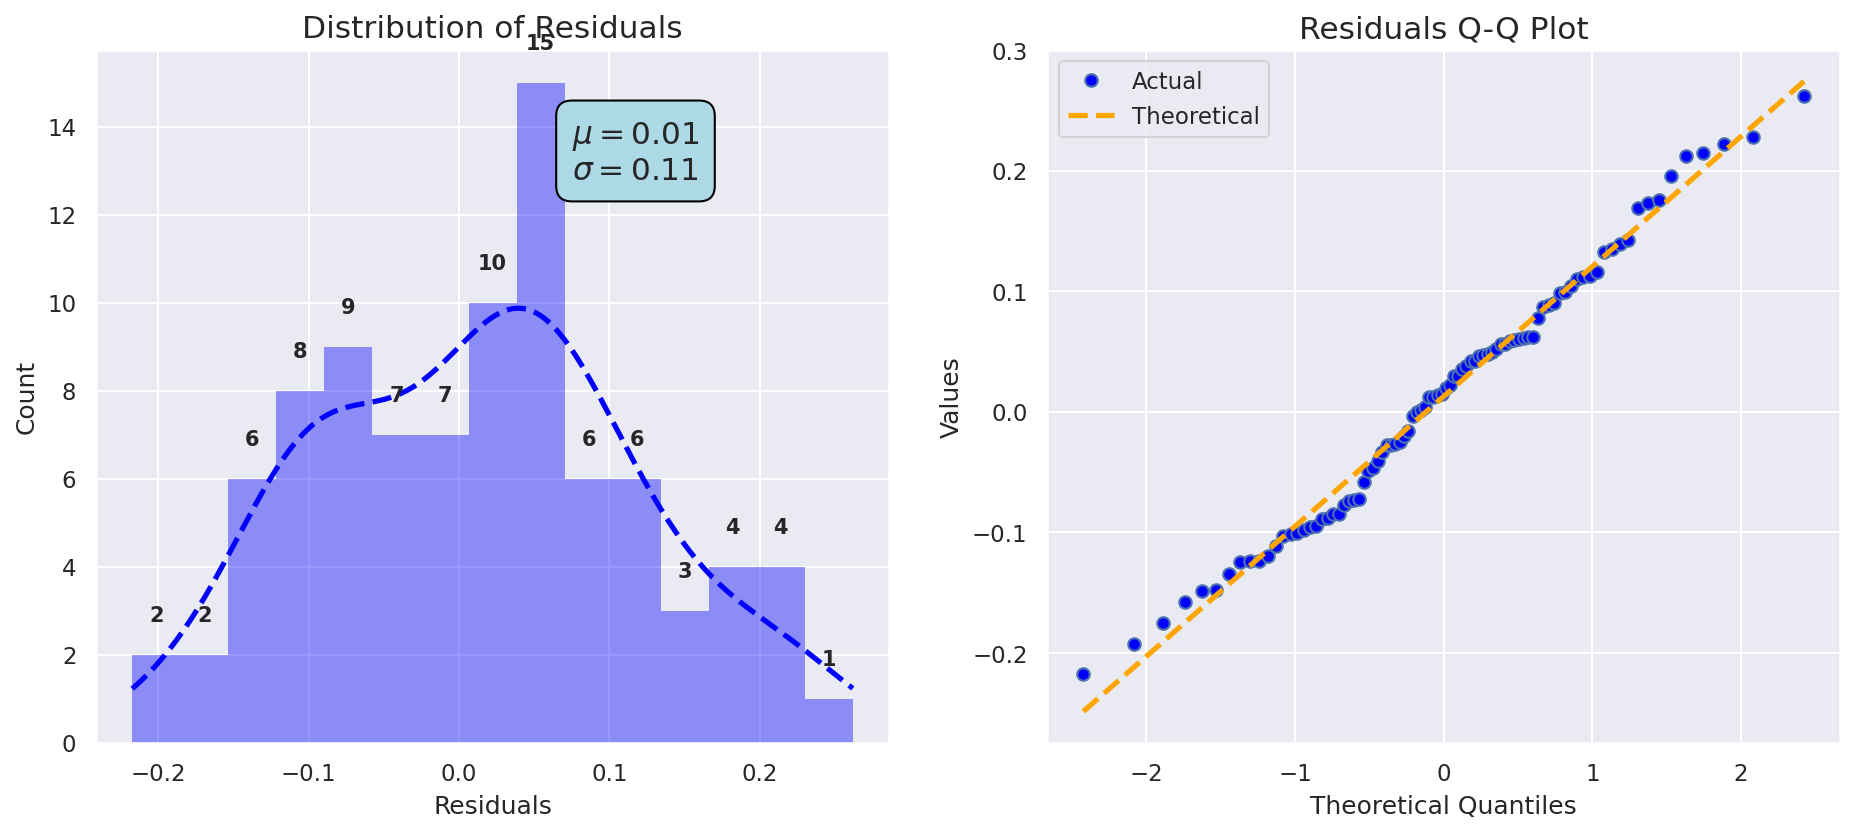

In [90]:
Check_normality_assumption(Poly_model ,X_poly_test ,y_poly_test ,alpha_value=0.05)

In [91]:
Check_Multicollinearity_assumption(X_poly)

33 cases of possible multicollinearity.
28 cases of definite multicollinearity.
High multicollinearity.Assumption not satisfied.

Condition Number value :  5.584133362912883e+16
High multicollinearity. Assumption not satisfied.



In [92]:
 Cheack_autocorrelation_assumption(Poly_model ,X_poly_test ,y_poly_test)

Durbin weston test value = 1.83607
No Autocorrelation. Assumption satisfied. 



The orange line should be flat.



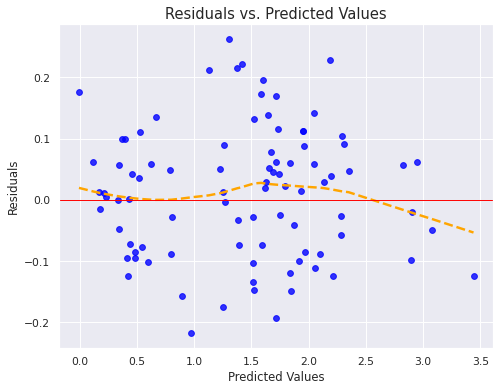



Breusch-Pagan test p-value:  9.159303e-11
Heteroscedasticity detected (variance is not constant).


In [93]:
Cheack_homoscedasticity_assumption(Poly_model ,X_poly_test ,y_poly_test)